<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Special_Strings_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Special Strings

Write a function that takes in a list of non-empty strings and returns a list of all the special strings found in the input list.

A string is said to be special if it's exactly made up of at least two instances of other strings in the input list of strings.

In order for a string to be special, just containing two instances of other strings isn't sufficient; the string must be exactly made up of those other strings. For example, in the list `["a", "b", "abc"]`, the string `"abc"` isn't special, even though it contains `"a"` and `"b"`, because `"c"` isn't a string in the list.

Note that strings can be repeated to form a special string; for instance, in the list `["a", "aaa"]`, the string `"aaa"` is a special string because it's made up of three repeated instances of `"a"`.

Also note that you can't use language-built-in string-matching methods.

Sample Input

```
strings = [
  "foobarbaz",
  "foo",
  "bar",
  "foobarfoo",
  "baz",
  "foobaz",
  "foofoofoo",
  "foobazar",
]
```



Sample Output

```
["foobarbaz", "foobarfoo", "foobaz", "foofoofoo"]
```



In [1]:
# Time = O(n * m)
# Space = O(n * m)

# n = len(strings)
# m = max(len(string))

def specialStrings(strings):
  tries_from_strings = get_tries(strings)
  # print
  special_strings = []

  return list(filter(lambda string: is_special_string(string, tries_from_strings.root, 0, 0, tries_from_strings), strings))

def get_tries(strings):
  tries_from_strings  = Tries()
  for string in strings:
    tries_from_strings.add_string_to_tries(string)
  return tries_from_strings

def is_special_string(string, children, idx, count, trie):
  char = string[idx]
  if char not in children:
    return False
  
  at_end_of_string = idx == len(string) - 1
  if at_end_of_string:
    return trie.end_symbol in children[char] and count + 1 >= 2
  
  if trie.end_symbol in children[char]:
    rest_is_special = is_special_string(string, trie.root, idx + 1, count + 1, trie)
    if rest_is_special:
      return True

  return is_special_string(string, children[char], idx + 1, count, trie)

class Tries:
  def __init__(self):
    self.root = {}
    self.end_symbol = '*'

  def add_string_to_tries(self, string):
    idx = 0
    children = self.root
    while idx <= len(string) - 1:
      if string[idx] not in children:
        children[string[idx]] = {}
      children = children[string[idx]]
      idx += 1
    children[self.end_symbol] = True

In [2]:
strings = [
  "foobarbaz",
  "foo",
  "bar",
  "foobarfoo",
  "baz",
  "foobaz",
  "foofoofoo",
  "foobazar",
]
special_strings_list = specialStrings(strings)
print(special_strings_list)

['foobarbaz', 'foobarfoo', 'foobaz', 'foofoofoo']


In [3]:
strings = ["foo", "baz", "foobar", "foobarbaz"]
special_strings_list = specialStrings(strings)
print(special_strings_list)

['foobarbaz']


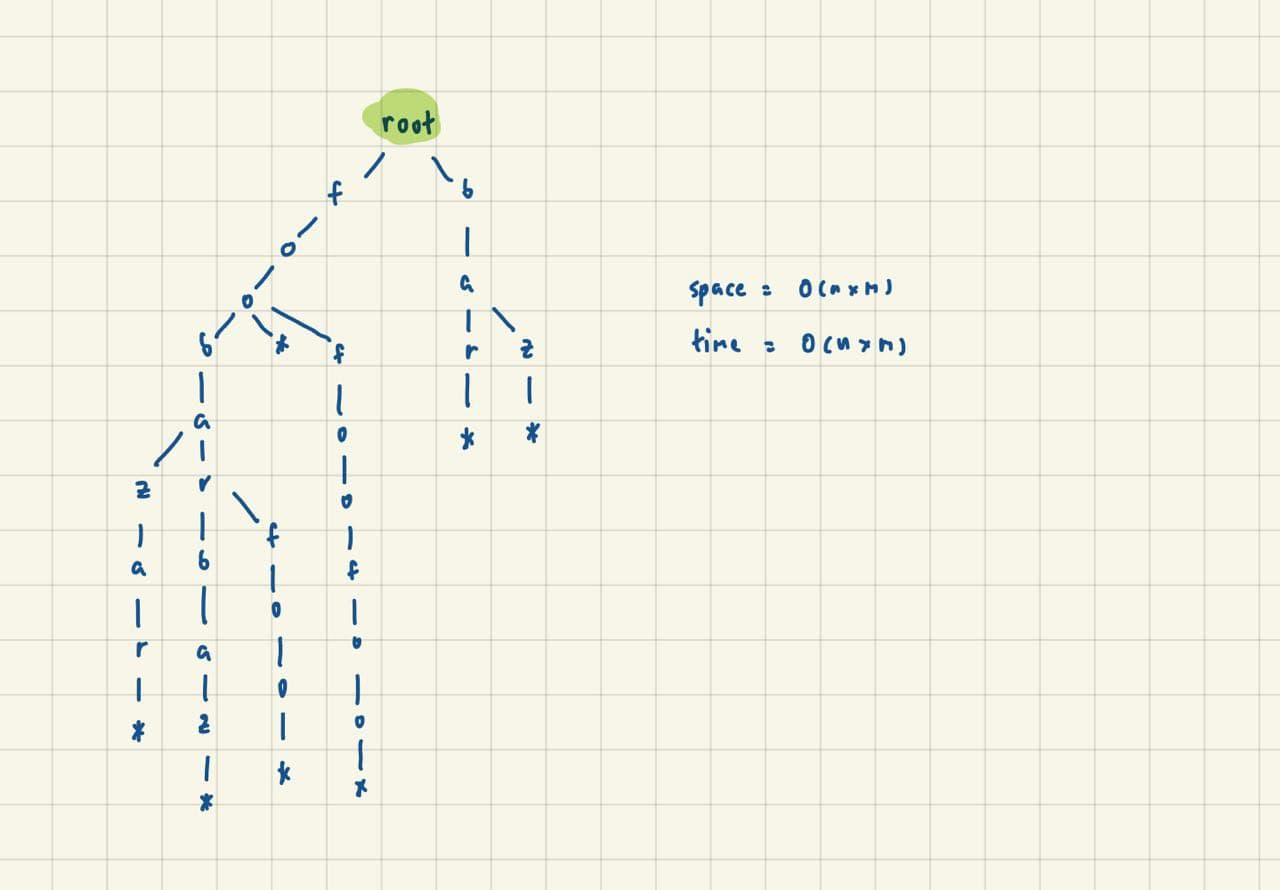